In [19]:
import tweepy
import pandas as pd
import re
unique_tweets = set()
tweet_list = []
df = pd.DataFrame(tweet_list)
df.head()

""


In [24]:
import tweepy
import pandas as pd
import re

consumer_key = "s6hHjNHNsZhCPbkzZqNAa41Hi"
consumer_secret = "OTjtAPxRRVpP2nfJv3PjoTCsxYAkCgF09MbKNEsBeXaNmX5kl8"
access_key = "1313457576319676419-jbPmWIeJRnnSPmrZMdSJvhAnlkHYJ3"
access_secret = "SwuBYrai7jsj3FTdiSN55U16oBVdDht6QfoS4F7SGccLs"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


hashtags = ["UPenn","PennQuakers", "UniversityofPennsylvania"]
unique_tweets = set()
tweet_list = []

for hashtag in hashtags:
        query = hashtag
        # Loop through search results using pagination
        for page in tweepy.Cursor(api.search_tweets, q=hashtag, lang='en', tweet_mode='extended',count =100).pages(200):
        # Loop through tweets on the page
            for tweet in page:
            # Check if the tweet is a retweet or a duplicate
                if 'retweeted_status' in dir(tweet):
                    tweet_text = tweet.retweeted_status.full_text
                else:
                    tweet_text = tweet.full_text
                    
                tweet_text = re.sub(r"(#[\d\w]+)|(http\S+)", "", tweet_text).strip()
                
                if tweet_text not in unique_tweets:
                    unique_tweets.add(tweet_text)
                
                    tweet_list.append({
                        'content': tweet_text, 
                        'hashtag': hashtag, 
                        'user': tweet.user.name,
                        'timestamp': tweet.created_at})

df = pd.DataFrame(tweet_list)
df.head()

,content,hashtag,user,timestamp
0,Relevant. Powerful. Needed. \n\nOn the 60th an...,UPenn,Teresa McClatchie,2023-05-06 00:29:36+00:00
1,This time also qualifies them for @newbalance ...,UPenn,Hazlet Township Public Schools,2023-05-06 00:28:10+00:00
2,Grateful to receive an offer to play for UPenn...,UPenn,Prep Redzone Florida,2023-05-06 00:11:20+00:00
3,Dr. Kyle Vining and Dr. Michael Mitchell have ...,UPenn,Penn Bioengineering,2023-05-05 23:51:46+00:00
4,Demand for diversity exceeds supply. In 2018 t...,UPenn,Justasmalltowngirl,2023-05-05 23:50:44+00:00


In [25]:
df.to_csv('srikar_upenn_fin.csv', index=False)

In [26]:
import pandas as pd
twelist=pd.read_csv('/content/srikar_upenn_fin.csv')

twelist

,content,hashtag,user,timestamp
0,Relevant. Powerful. Needed. \n\nOn the 60th an...,UPenn,Teresa McClatchie,2023-05-06 00:29:36+00:00
1,This time also qualifies them for @newbalance ...,UPenn,Hazlet Township Public Schools,2023-05-06 00:28:10+00:00
2,Grateful to receive an offer to play for UPenn...,UPenn,Prep Redzone Florida,2023-05-06 00:11:20+00:00
3,Dr. Kyle Vining and Dr. Michael Mitchell have ...,UPenn,Penn Bioengineering,2023-05-05 23:51:46+00:00
4,Demand for diversity exceeds supply. In 2018 t...,UPenn,Justasmalltowngirl,2023-05-05 23:50:44+00:00
...,...,...,...,...
1619,Pumped up to be included in the Spring 2023 is...,UniversityofPennsylvania,Nidhi Agrawal,2023-05-04 07:23:26+00:00
1620,Announces the Activation of its Clinical Tria...,UniversityofPennsylvania,1stOncology,2023-05-03 10:24:27+00:00
1621,@davidrlurie ? That's the same diploma factory...,UniversityofPennsylvania,Alfred E. Neuman,2023-04-30 18:34:26+00:00
1622,The Hey Day tradition continues strong with th...,UniversityofPennsylvania,Yiota Theodora,2023-04-29 14:08:25+00:00


In [28]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
twelist = pd.DataFrame(tweet_list)

#Removing RT, Punctuation etc
rert = lambda x: re.sub('RT @\w+: ',' ',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
twelist['content'] = twelist.content.map(rert).map(rt)
twelist['content'] = twelist.content.str.lower()
twelist.head(10)

,content,hashtag,user,timestamp
0,relevant powerful needed on the 60th anni...,UPenn,Teresa McClatchie,2023-05-06 00:29:36+00:00
1,this time also qualifies them for nationals ...,UPenn,Hazlet Township Public Schools,2023-05-06 00:28:10+00:00
2,grateful to receive an offer to play for upenn...,UPenn,Prep Redzone Florida,2023-05-06 00:11:20+00:00
3,dr kyle vining and dr michael mitchell have ...,UPenn,Penn Bioengineering,2023-05-05 23:51:46+00:00
4,demand for diversity exceeds supply in 2018 t...,UPenn,Justasmalltowngirl,2023-05-05 23:50:44+00:00
5,joe geraghty md phd a lifelong dream come t...,UPenn,Joe Geraghty,2023-05-05 23:13:52+00:00
6,two tutorials six exciting keynotes 16 oral...,UPenn,jayeshthakur,2023-05-05 23:11:05+00:00
7,we are looking for a highly motivated individu...,UPenn,Jilian Melamed,2023-05-05 23:09:37+00:00
8,kitten elon s father is a real estate t...,UPenn,Brazen Icing,2023-05-05 23:03:25+00:00
9,gorilla kinda related but heres an interes...,UPenn,maratgirsu 𒀯,2023-05-05 22:56:33+00:00


In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Create bag-of-words feature matrix
vectorizerr = CountVectorizer(stop_words='english')
bow_matrix = vectorizerr.fit_transform(twelist['content'])

# Create TF-IDF feature matrix
tfidf_vectorizerr = TfidfVectorizer(stop_words='english')
tfidf_matriz = tfidf_vectorizerr.fit_transform(twelist['content'])

# print(tfidf_matrix)
print(bow_matrix[0])

  (0, 5690)	1
  (0, 5257)	1
  (0, 4643)	1
  (0, 233)	1
  (0, 601)	1
  (0, 2704)	1
  (0, 2420)	1
  (0, 6490)	1
  (0, 643)	1
  (0, 6918)	1
  (0, 5333)	1
  (0, 6461)	1
  (0, 4025)	2
  (0, 3269)	1
  (0, 3500)	1
  (0, 1984)	1
  (0, 3818)	1
  (0, 6786)	1


In [30]:

!pip install keras
!pip install  tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.4 MB/s eta 0:00:00


In [78]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

tokenizerer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
modaal = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
classifierer = pipeline('sentiment-analysis', tokenizer=tokenizerer, model=modaal)

tweets = twelist['content'].tolist()

rezult = classifierer(tweets)
textlizt = twelist['content'].tolist()

sentiments = []
for result in rezult:
    sentiment = result['label']
    sentiments.append(sentiment)

senti_df = pd.DataFrame({'content': textlizt, 'sentiment': sentiments})
print(senti_df.head())


                                             content sentiment
0  relevant  powerful  needed    on the 60th anni...  POSITIVE
1  this time also qualifies them for   nationals ...  POSITIVE
2  grateful to receive an offer to play for upenn...  POSITIVE
3  dr  kyle vining and dr  michael mitchell have ...  POSITIVE
4  demand for diversity exceeds supply  in 2018 t...  NEGATIVE


In [79]:
senti_df['sentiment'] = senti_df['sentiment'].replace({'POSITIVE': 1, 'NEGATIVE': 0})

In [81]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(twelist['content'])
sequences = tokenizer.texts_to_sequences(twelist['content'])

# Pad sequences
maxle = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=maxle, padding='post')

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=maxle),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(padded_sequences, senti_df['sentiment'], epochs=10, validation_split=0.2)

Epoch 1/10
41/41 [==============================] - 9s 116ms/step - loss: 0.6808 - accuracy: 0.5951 - val_loss: 0.7164 - val_accuracy: 0.4462
Epoch 2/10
41/41 [==============================] - 6s 140ms/step - loss: 0.6694 - accuracy: 0.6159 - val_loss: 0.7113 - val_accuracy: 0.5323
Epoch 3/10
41/41 [==============================] - 4s 96ms/step - loss: 0.5671 - accuracy: 0.7283 - val_loss: 0.4854 - val_accuracy: 0.7785
Epoch 4/10
41/41 [==============================] - 4s 97ms/step - loss: 0.2748 - accuracy: 0.9061 - val_loss: 0.5747 - val_accuracy: 0.7785
Epoch 5/10
41/41 [==============================] - 6s 136ms/step - loss: 0.1136 - accuracy: 0.9669 - val_loss: 0.6696 - val_accuracy: 0.7692
Epoch 6/10
41/41 [==============================] - 4s 104ms/step - loss: 0.0621 - accuracy: 0.9831 - val_loss: 1.2458 - val_accuracy: 0.7323
Epoch 7/10
41/41 [==============================] - 4s 98ms/step - loss: 0.1325 - accuracy: 0.9654 - val_loss: 0.9360 - val_accuracy: 0.7292
Epoch 8/1

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, senti_df['sentiment'], test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Make predictions on test data
y_pred_probs = model.predict(X_test)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Epoch 1/10
33/33 [==============================] - 3s 103ms/step - loss: 0.2593 - accuracy: 0.9259 - val_loss: 0.2340 - val_accuracy: 0.9269
Epoch 2/10
33/33 [==============================] - 3s 101ms/step - loss: 0.1394 - accuracy: 0.9663 - val_loss: 0.2236 - val_accuracy: 0.9308
Epoch 3/10
33/33 [==============================] - 3s 99ms/step - loss: 0.0748 - accuracy: 0.9836 - val_loss: 0.2043 - val_accuracy: 0.9462
Epoch 4/10
33/33 [==============================] - 5s 144ms/step - loss: 0.0497 - accuracy: 0.9904 - val_loss: 0.1893 - val_accuracy: 0.9500
Epoch 5/10
33/33 [==============================] - 3s 97ms/step - loss: 0.0382 - accuracy: 0.9923 - val_loss: 0.2027 - val_accuracy: 0.9500
Epoch 6/10
33/33 [==============================] - 3s 96ms/step - loss: 0.0265 - accuracy: 0.9942 - val_loss: 0.2205 - val_accuracy: 0.9462
Epoch 7/10
33/33 [==============================] - 3s 93ms/step - loss: 0.0199 - accuracy: 0.9942 - val_loss: 0.2420 - val_accuracy: 0.9462
Epoch 8/10

11/11 [==============================] - 0s 20ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       133
           1       0.96      0.96      0.96       192

    accuracy                           0.96       325
   macro avg       0.96      0.96      0.96       325
weighted avg       0.96      0.96      0.96       325



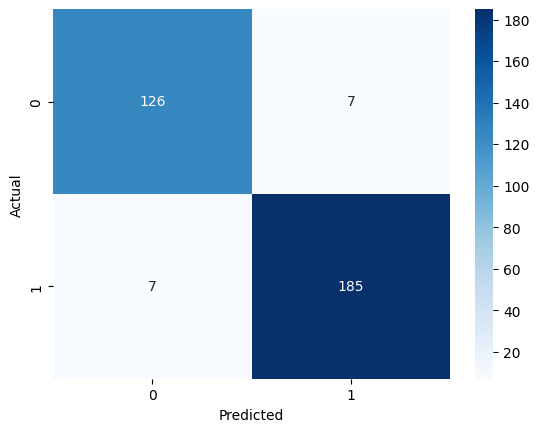

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on test data
y_pred_probs = model.predict(X_test)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Get classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#print('Confusion Matrix:\n', conf_matrix)

# Visualize confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Confusion Matrix')
plt.show()


In [93]:
# Tokenize test data
test_texts = ["I don't think people would like to go to college here","i am a good boy","the world is a peacefull place","you should love more","shiela is angry and in a bad mood","children are very playful and cheering",
              "riyan is not thankful to rr for providing so many chances although his performance is shit","many people hate UNCC for giving more assignments","college life is pretty amazing. It is the best time to live",
              "What is the point of college if there are no jobs available?"]
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded_sequences = pad_sequences(test_sequences, maxlen=maxle, padding='post')

# Make prediction
predictions = model.predict(test_padded_sequences)

# Print predictions
for i in range(len(test_texts)):
    if predictions[i] > 0.5:
        print(f"'{test_texts[i]}' - Positive sentiment")
    else:
        print(f"'{test_texts[i]}' - Negative sentiment")


1/1 [==============================] - 0s 50ms/step
'I don't think people would like to go to college here' - Negative sentiment
'i am a good boy' - Positive sentiment
'the world is a peacefull place' - Positive sentiment
'you should love more' - Positive sentiment
'shiela is angry and in a bad mood' - Negative sentiment
'children are very playful and cheering' - Positive sentiment
'riyan is not thankful to rr for providing so many chances although his performance is shit' - Negative sentiment
'many people hate UNCC for giving more assignments' - Negative sentiment
'college life is pretty amazing. It is the best time to live' - Positive sentiment
'What is the point of college if there are no jobs available?' - Negative sentiment
